In [2]:
#DATA importing and Cleaning
import pandas as pd
import os

#Opening and concatening the files for females and males folders
female = pd.DataFrame()
indir = '/Users/TarjaniAgrawal/Desktop/Springboard/Capstone I_data/Female data'
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        x = pd.DataFrame.from_csv(indir + '/' + f, index_col= None, sep='\t')
        female = pd.concat([female, x], ignore_index=True)
male = pd.DataFrame()
male.tail()
indir = '/Users/TarjaniAgrawal/Desktop/Springboard/Capstone I_data/Male data'
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        x = pd.DataFrame.from_csv(indir + '/' + f, index_col= None, sep='\t')
        male = pd.concat([male, x], ignore_index=True)
# Adding Sex column to female and male dataframes
import numpy as np
F = np.array('Female')
female['Sex']= F
M = np.array('Male')
male['Sex']= M
#Concatening male and female columns
df = pd.concat([female, male], ignore_index=True)
#Deleting NOTES column and CODES columns
df = df.drop(['Notes', 'State Code', 'Cancer Sites Code', 'Year Code', 'Age Group Code', 'Race Code'], axis=1)
#Deleting NaN rows
df = df[df.State.notnull()]  
#Checking different types of values in Deaths columns
#df['Deaths'].value_counts()
# Dropping rows with Deaths as Not applicable which mainly has rows for cancer site as female sex organ for males and vice versa
df = df[df['Deaths'] != 'Not Applicable']
# Looking at the different types of values in other columns in case they have any Nan
#cols = ['State', 'Cancer Sites', 'Year', 'Age Group', 'Race', 'Deaths', 'Population', 'Crude Rate', 'Sex']
#for col in cols:
    #x = df[col].value_counts()
    #print(x)

# Dropping the rows with Crude Rate or Population is equal to Not Applicable 
df = df[(df['Crude Rate'] != 'Not Applicable') | (df['Population'] != 'Not Applicable')]
# Taking dataframe without Suppressed values for now. 
df = df[(df['Deaths'] != 'Suppressed') | (df['Crude Rate'] != 'Suppressed')]
df.head()





,State,Cancer Sites,Year,Age Group,Race,Deaths,Population,Crude Rate,Sex
0,Alabama,Oral Cavity and Pharynx,1999.0,< 1 year,American Indian or Alaska Native,0,104,0.0,Female
1,Alabama,Oral Cavity and Pharynx,1999.0,< 1 year,Asian or Pacific Islander,0,245,0.0,Female
2,Alabama,Oral Cavity and Pharynx,1999.0,1-4 years,American Indian or Alaska Native,0,535,0.0,Female
3,Alabama,Oral Cavity and Pharynx,1999.0,1-4 years,Asian or Pacific Islander,0,1193,0.0,Female
4,Alabama,Oral Cavity and Pharynx,1999.0,5-9 years,American Indian or Alaska Native,0,874,0.0,Female


In [3]:
# Looking at the data types of columns 
cols = ['State', 'Cancer Sites', 'Year', 'Age Group', 'Race', 'Deaths', 'Population', 'Crude Rate', 'Sex']
for col in cols:
    x = df[col].dtype
    print(col , x)

State object
Cancer Sites object
Year float64
Age Group object
Race object
Deaths object
Population object
Crude Rate object
Sex object


In [4]:
#Converting datatypes of Deaths, Population and Crude Rate
col_name = ['Deaths', 'Population', 'Crude Rate']
for col in col_name:
    df[col] = pd.to_numeric(df[col])
    t = df[col].dtype
    print(col , t)

Deaths int64
Population int64
Crude Rate float64


In [5]:
#Converting datatypes of year as object
col_name = ['Year']
for col in col_name:
    df[col] = df[col].apply(str)
    t = df[col].dtype
    print(col , t)

Year object


In [6]:
df.head()

,State,Cancer Sites,Year,Age Group,Race,Deaths,Population,Crude Rate,Sex
0,Alabama,Oral Cavity and Pharynx,1999.0,< 1 year,American Indian or Alaska Native,0,104,0.0,Female
1,Alabama,Oral Cavity and Pharynx,1999.0,< 1 year,Asian or Pacific Islander,0,245,0.0,Female
2,Alabama,Oral Cavity and Pharynx,1999.0,1-4 years,American Indian or Alaska Native,0,535,0.0,Female
3,Alabama,Oral Cavity and Pharynx,1999.0,1-4 years,Asian or Pacific Islander,0,1193,0.0,Female
4,Alabama,Oral Cavity and Pharynx,1999.0,5-9 years,American Indian or Alaska Native,0,874,0.0,Female


# If the difference in deaths due to cancer is significantly different in males and females?

In [7]:
dfsex = df[['Deaths','Sex']]
dfsex.head()

,Deaths,Sex
0,0,Female
1,0,Female
2,0,Female
3,0,Female
4,0,Female


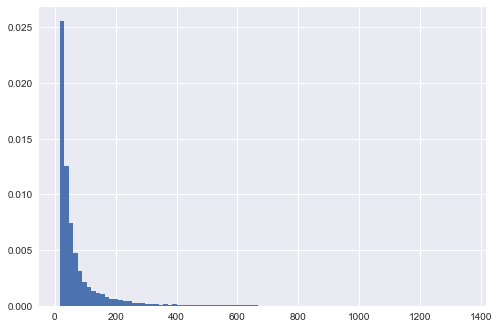

In [8]:
dffemale = dfsex[(dfsex['Sex'] == 'Female') & (dfsex['Deaths'] != 0)]
#dffemale.loc[:,'Deaths'] = np.log(dffemale['Deaths'])
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(dffemale['Deaths'],normed= True, bins = 90)
plt.show()

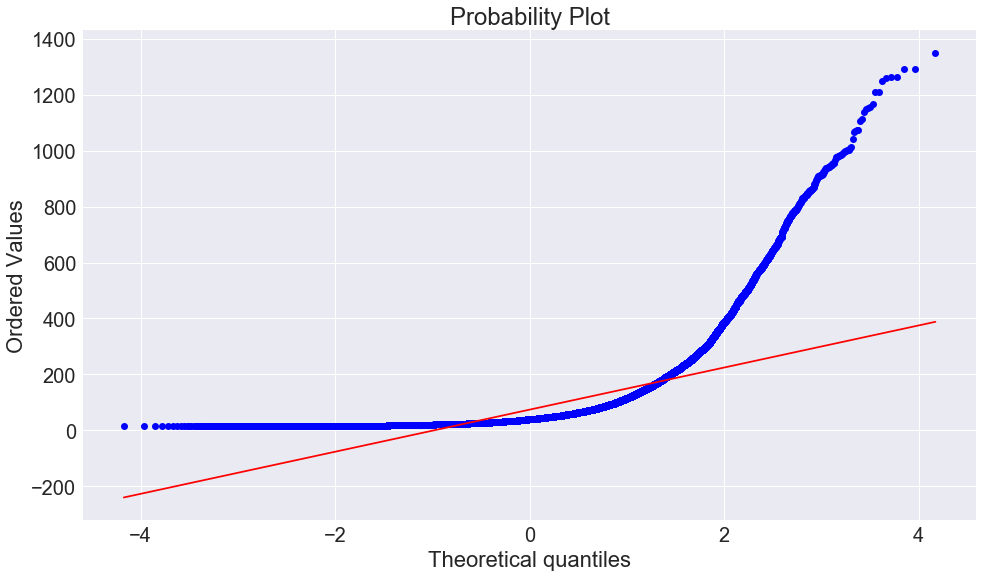

In [92]:
stats.probplot(dffemale['Deaths'], dist="norm", plot=plt)
plt.show()

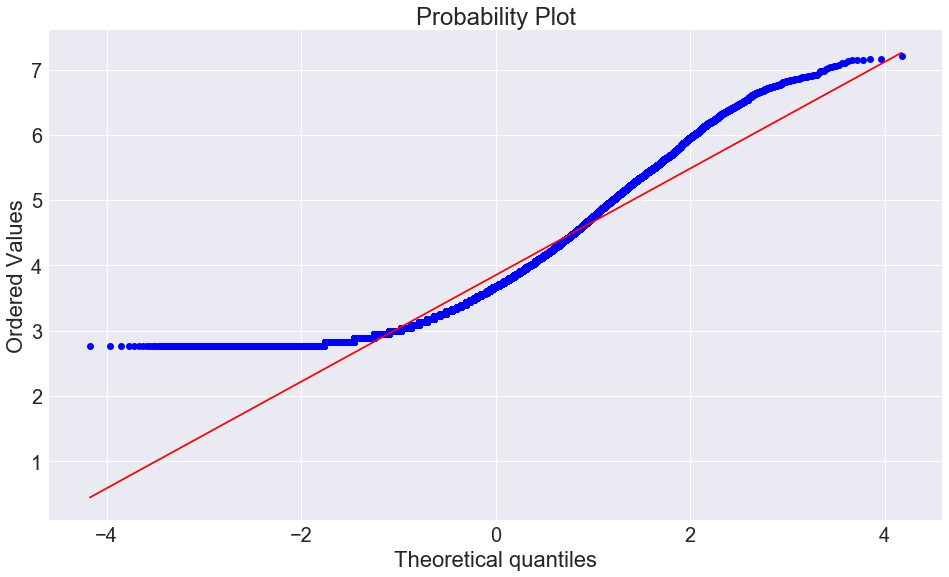

In [95]:
dffemale_newone = np.log(dffemale['Deaths'])
stats.probplot(dffemale_newone, dist="norm", plot=plt)
plt.show()

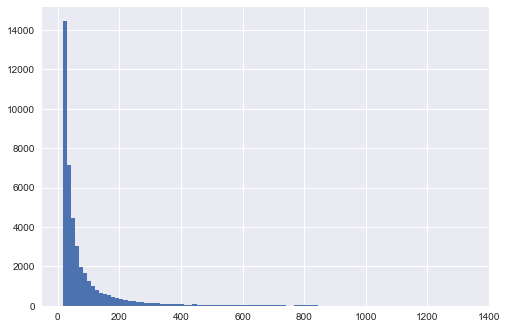

In [9]:
dfmale = dfsex[(dfsex['Sex'] == 'Male') & (dfsex['Deaths'] != 0)]
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(dfmale['Deaths'], bins = 100)
plt.show()

In [10]:
dffemale.describe()


,Deaths
count,46058.000000
mean,74.065027
std,102.038827
min,16.000000
25%,24.000000
50%,39.000000
75%,77.000000
max,1350.000000


In [11]:
dfmale.describe()

,Deaths
count,42171.000000
mean,83.739584
std,121.162504
min,16.000000
25%,24.000000
50%,41.000000
75%,86.000000
max,1333.000000


In [96]:
group1 = dffemale['Deaths']
group2 = dfmale['Deaths']
stats.mannwhitneyu(dffemale['Deaths'],dfmale['Deaths'])


MannwhitneyuResult(statistic=936576053.0, pvalue=2.7957116459325165e-20)

# To find the race that has significant effect on the deaths


In [15]:
dfrace = df[['Deaths','Race', 'Crude Rate']]
dfrace.head()

,Deaths,Race,Crude Rate
0,0,American Indian or Alaska Native,0.0
1,0,Asian or Pacific Islander,0.0
2,0,American Indian or Alaska Native,0.0
3,0,Asian or Pacific Islander,0.0
4,0,American Indian or Alaska Native,0.0


In [16]:
dfrace.describe()

,Deaths,Crude Rate
count,1.604437e+06,1.604437e+06
mean,4.327168e+00,7.820038e+00
std,3.174580e+01,5.260628e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,1.350000e+03,2.390400e+03


In [17]:
#dfrace_white= dfrace.groupby('Race').get_group('White')
#dfrace_amind= dfrace.groupby('Race').get_group('American Indian or Alaska Native')
#dfrace_apisl= dfrace.groupby('Race').get_group('Asian or Pacific Islander')
#rdfrace_blk=dfrace.groupby('Race').get_group('Black or African American')

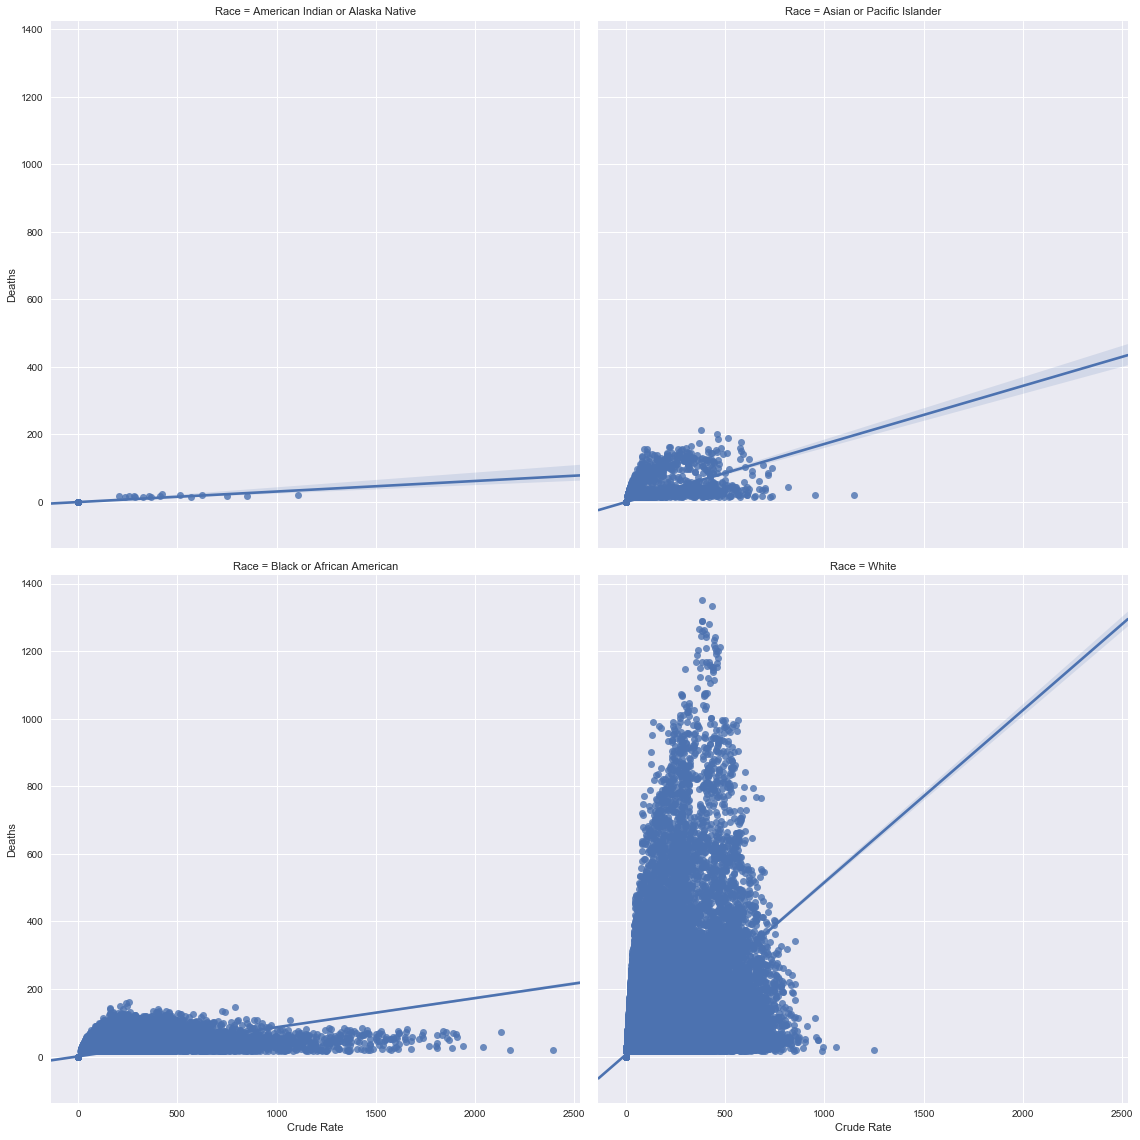

In [18]:
g = sns.lmplot(x="Crude Rate", y="Deaths", col = 'Race', size=8, data=dfrace, col_wrap=2)
plt.show()

In [19]:
dfrace_now= dfrace.groupby('Race').describe()
dfrace_now

Crude Rate         Deaths
Race                                                                
American Indian or Alaska Native count  434716.000000  434716.000000
                                 mean        0.017403       0.000672
                                 std         3.228376       0.111431
                                 min         0.000000       0.000000
                                 25%         0.000000       0.000000
                                 50%         0.000000       0.000000
                                 75%         0.000000       0.000000
                                 max      1107.000000      23.000000
Asian or Pacific Islander        count  415444.000000  415444.000000
                                 mean        0.648188       0.175448
                                 std        14.143580       3.511078
                                 min         0.000000       0.000000
                                 25%         0.000000       0.000000
                                 50%         0.000000       0.000000
                                 75%         0.000000       0.000000
                                 max      1150.700000     214.000000
Black or African American        count  416021.000000  416021.000000
                                 mean        9.797996       1.496547
                                 std        69.442912       8.515318
                                 min         0.000000       0.000000
                                 25%         0.000000       0.000000
                                 50%         0.000000       0.000000
                                 75%         0.000000       0.000000
                                 max      2390.400000     161.000000
White                            count  338256.000000  338256.000000
                                 mean       24.223473      18.467944
                                 std        80.754428      66.489623
                                 min         0.000000       0.000000
                                 25%         0.000000       0.000000
                                 50%         0.000000       0.000000
                                 75%         0.000000       0.000000
                                 max      1247.400000    1350.000000

# If white population has significantly higher deaths then other race populations

In [20]:
dfrace_wht = dfrace[dfrace['Race'] == 'White']
dfrace_oth = dfrace[dfrace['Race'] != 'White']

In [21]:
dfmean1 = dfrace_wht['Deaths'].mean()
dfmean2 = dfrace_oth['Deaths'].mean()
print(dfmean1, dfmean2)

18.467944397142993 0.5495075348627092


In [23]:
import scipy.stats as stats
stats.ttest_ind(dfrace_wht['Deaths'], dfrace_oth['Deaths'], equal_var=False)

Ttest_indResult(statistic=156.60215881980056, pvalue=0.0)

The p_value is zero suggesting that white population has highly significant deaths compared to other race population therefore concluding that the deaths due to cancer is more common in whites than other race people. 

# To find how age group affect on the deaths due to cancer



In [24]:
dfage = df[['Age Group', 'Deaths']]
dfage.head()

,Age Group,Deaths
0,< 1 year,0
1,< 1 year,0
2,1-4 years,0
3,1-4 years,0
4,5-9 years,0


In [25]:
dfage_new = dfage.groupby('Age Group')
dfage_new

In [26]:
dfage_new1 = dfage_new.mean().reset_index()
dfage_new1

,Age Group,Deaths
0,1-4 years,0.000174
1,10-14 years,0.000936
2,15-19 years,0.003022
3,20-24 years,0.003438
4,25-29 years,0.003003
5,30-34 years,0.027944
6,35-39 years,0.168863
7,40-44 years,0.794327
8,45-49 years,2.312219
9,5-9 years,0.000401


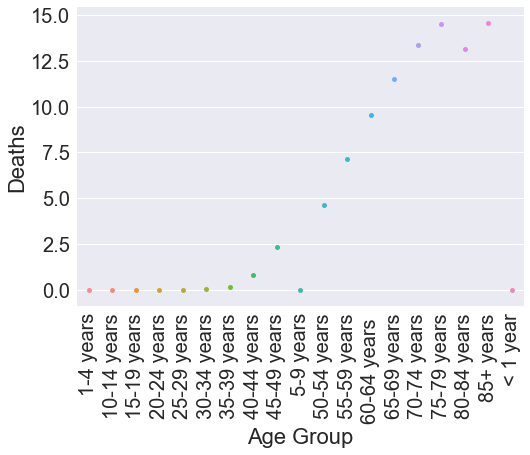

In [27]:
sns.set(font_scale=2)
p = sns.stripplot(x = 'Age Group', y = 'Deaths', data = dfage_new1)
plt.xticks(rotation =90)
plt.show()

# To check if after age 50 there is significant increase in number of deaths 

In [28]:
dfage_new1['Age Group'].unique()

array(['1-4 years', '10-14 years', '15-19 years', '20-24 years',
       '25-29 years', '30-34 years', '35-39 years', '40-44 years',
       '45-49 years', '5-9 years', '50-54 years', '55-59 years',
       '60-64 years ', '65-69 years', '70-74 years', '75-79 years',
       '80-84 years', '85+ years', '< 1 year'], dtype=object)

In [30]:
dfage_50plus = dfage[(dfage['Age Group'] == '50-54 years')| 
                     (dfage['Age Group'] =='55-59 years')|
                     (dfage['Age Group'] =='60-64 years ')| 
                     (dfage['Age Group'] =='65-69 years')|
                     (dfage['Age Group'] =='70-74 years')| 
                     (dfage['Age Group'] =='75-79 years')|
                     (dfage['Age Group'] =='80-84 years')|
                     (dfage['Age Group'] =='85+ years')]
dfage_50minus = dfage[(dfage['Age Group'] == '< 1 year')| 
                     (dfage['Age Group'] =='1-4 years')|
                     (dfage['Age Group'] =='5-9 years')| 
                     (dfage['Age Group'] =='10-14 years')|
                     (dfage['Age Group'] =='15-19 years')| 
                     (dfage['Age Group'] =='20-24 years')|
                     (dfage['Age Group'] =='25-29 years')|
                     (dfage['Age Group'] =='30-34 years')|
                    (dfage['Age Group'] == '35-39 years')| 
                     (dfage['Age Group'] =='40-44 years')|
                     (dfage['Age Group'] =='45-49 years')]

In [31]:
dfage_50plus_mean = dfage_50plus['Deaths'].mean()
dfage_50minus_mean = dfage_50minus['Deaths'].mean()
print(dfage_50plus_mean, dfage_50minus_mean)

11.08668170808587 0.25940915902349804


In [32]:
stats.ttest_ind(dfage_50plus['Deaths'], dfage_50minus['Deaths'], equal_var= False)

Ttest_indResult(statistic=165.05867839846283, pvalue=0.0)

There is a significant affect of age on deaths due to cancer. After age 50 the deaths due to cancer are significantly higher than deaths due to cancer for age below 50. 

# To see how deaths due to cancer change over time.

In [33]:
dfyear = df[['Year', 'Deaths']]
dfyear.head()

,Year,Deaths
0,1999.0,0
1,1999.0,0
2,1999.0,0
3,1999.0,0
4,1999.0,0


In [34]:
dfyear1 = dfyear.groupby('Year').mean().reset_index()
dfyear1

,Year,Deaths
0,1999.0,4.109566
1,2000.0,4.023262
2,2001.0,4.113195
3,2002.0,3.996363
4,2003.0,4.206516
5,2004.0,4.190729
6,2005.0,4.174143
7,2006.0,4.255416
8,2007.0,4.131906
9,2008.0,4.088756


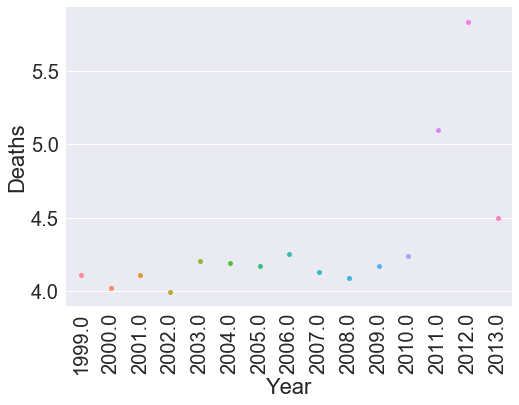

In [35]:
sns.stripplot(x= 'Year', y = 'Deaths', data = dfyear1)
plt.xticks(rotation =90)
plt.show()

# To see if deaths due to cancer increased since 2011 significantly 

In [42]:
dfyear_after2011 = dfyear[(dfyear['Year'] == '2011.0') |(dfyear['Year'] == '2012.0') |(dfyear['Year'] == '2013.0') ]
dfyear_before2011 = dfyear[(dfyear['Year'] != '2011.0') |(dfyear['Year'] != '2012.0') |(dfyear['Year'] != '2013.0') ]

In [44]:
dfyear_after2011_mean = dfyear_after2011['Deaths'].mean()
dfyear_before2011_mean = dfyear_before2011['Deaths'].mean()
print(dfyear_after2011_mean, dfyear_before2011_mean)

5.08592230857418 4.3271683462797235


In [55]:
stats.ttest_ind(dfyear_after2011['Deaths'], dfyear_before2011['Deaths'], equal_var= False)

Ttest_indResult(statistic=11.589982075114873, pvalue=4.681746786582944e-31)

There was a significant increase in deaths due to cancer since 2011. 

# To see how different cancer sites affect the deaths due to cancer.

In [46]:
dfsite = df[['Cancer Sites', 'Deaths']]
dfsite.head()

,Cancer Sites,Deaths
0,Oral Cavity and Pharynx,0
1,Oral Cavity and Pharynx,0
2,Oral Cavity and Pharynx,0
3,Oral Cavity and Pharynx,0
4,Oral Cavity and Pharynx,0


In [50]:
dfsite1 = dfsite.groupby('Cancer Sites').mean().reset_index().sort_values(by = 'Deaths')
dfsite1

,Cancer Sites,Deaths
4,Eye and Orbit,0.000000
6,Kaposi Sarcoma,0.000000
0,Bones and Joints,0.000154
3,Endocrine System,0.015191
16,Soft Tissue including Heart,0.051366
11,Mesothelioma,0.086422
13,Oral Cavity and Pharynx,0.476697
12,Myeloma,0.850838
15,Skin excluding Basal and Squamous,0.953622
1,Brain and Other Nervous System,1.192729


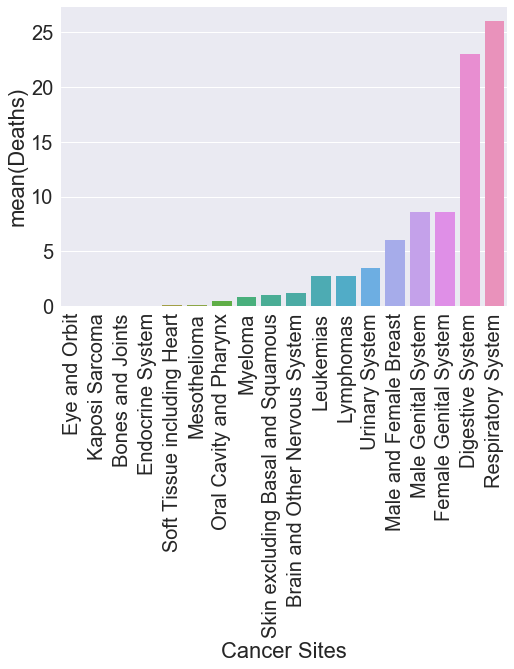

In [51]:
sns.barplot(x= 'Cancer Sites', y = 'Deaths', data= dfsite1)
plt.xticks(rotation = 90)
plt.show()

# To see if there is significant difference in deaths due to Respiratory system cancer Vs digestive system cancer


In [52]:
dfsite_res = dfsite[dfsite['Cancer Sites'] == 'Respiratory System']
dfsite_dig = dfsite[dfsite['Cancer Sites'] == 'Digestive System']

In [53]:
dfsite_res_mean = dfsite_res['Deaths'].mean()
dfsite_dig_mean = dfsite_dig['Deaths'].mean()
print(dfsite_res_mean, dfsite_dig_mean)

26.028361344537814 23.069212493079903


In [54]:
stats.ttest_ind(dfsite_dig['Deaths'], dfsite_res['Deaths'], equal_var= False)

Ttest_indResult(statistic=-7.4976476149185283, pvalue=6.5272625509410195e-14)

There is a significant affect of cancer site on deaths. and Respiratory cancer results in significantly higher number of deaths.

# To see how the deaths due to cancer are geographically distributed

In [56]:
dfstate = df[['State', 'Deaths']]
dfstate.head()

,State,Deaths
0,Alabama,0
1,Alabama,0
2,Alabama,0
3,Alabama,0
4,Alabama,0


In [57]:
dfstate1 = dfstate.groupby('State').mean().reset_index().sort_values(by = 'Deaths')
dfstate1

,State,Deaths
1,Alaska,0.031550
50,Wyoming,0.107940
8,District of Columbia,0.122378
45,Vermont,0.245995
34,North Dakota,0.257406
41,South Dakota,0.355232
7,Delaware,0.357471
11,Hawaii,0.377775
26,Montana,0.459741
39,Rhode Island,0.599037


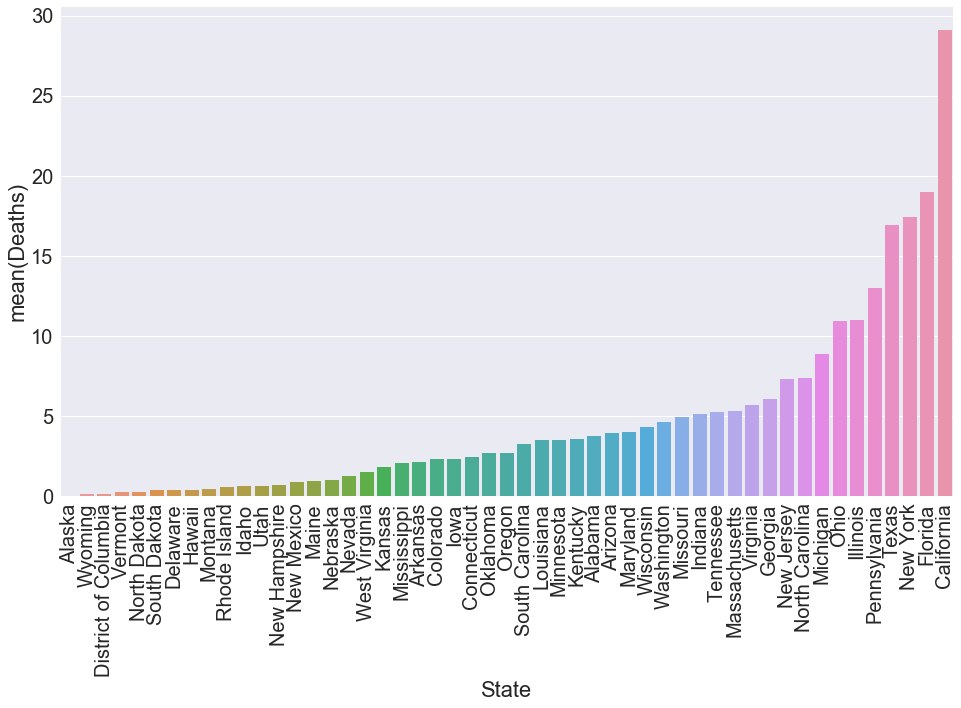

In [63]:
sns.set_context(rc={'figure.figsize': (16,9)})
sns.barplot(x= 'State', y = 'Deaths', data= dfstate1)
plt.xticks(rotation = 90)
plt.show()

# To see if california has significantly higher deaths due to cancer as compared to other states

In [64]:
dfstate_cal = dfstate[dfstate['State'] == 'California']
dfstate_oth = dfstate[dfstate['State'] != 'California']


In [65]:
dfstate_cal_mean = dfstate_cal['Deaths'].mean()
dfstate_oth_mean = dfstate_oth['Deaths'].mean()
print(dfstate_cal_mean, dfstate_oth_mean)



29.082717408397546 3.9283831992506655


In [66]:
stats.ttest_ind(dfstate_cal['Deaths'], dfstate_oth['Deaths'])

Ttest_indResult(statistic=125.98484901060164, pvalue=0.0)

There is significantly higher deaths due to cancer in state of california as compared to rest of the states of US. 

# To see which class in California leads to significantly higher deaths 

In [69]:
dfcal = df[df['State'] == 'California']
dfcal.head()

,State,Cancer Sites,Year,Age Group,Race,Deaths,Population,Crude Rate,Sex
2736,California,Oral Cavity and Pharynx,1999.0,< 1 year,American Indian or Alaska Native,0,3590,0.0,Female
2737,California,Oral Cavity and Pharynx,1999.0,< 1 year,Asian or Pacific Islander,0,24938,0.0,Female
2738,California,Oral Cavity and Pharynx,1999.0,1-4 years,American Indian or Alaska Native,0,15249,0.0,Female
2739,California,Oral Cavity and Pharynx,1999.0,1-4 years,Asian or Pacific Islander,0,107985,0.0,Female
2740,California,Oral Cavity and Pharynx,1999.0,5-9 years,American Indian or Alaska Native,0,23066,0.0,Female


In [85]:
dfcal_site = dfcal[['Cancer Sites', 'Deaths']]
dfcal_site.head()

,Cancer Sites,Deaths
2736,Oral Cavity and Pharynx,0
2737,Oral Cavity and Pharynx,0
2738,Oral Cavity and Pharynx,0
2739,Oral Cavity and Pharynx,0
2740,Oral Cavity and Pharynx,0


In [86]:
dfcal_site1 = dfcal_site.groupby('Cancer Sites').mean().reset_index().sort_values(by = 'Deaths')
dfcal_site1.head()

,Cancer Sites,Deaths
4,Eye and Orbit,0.000000
6,Kaposi Sarcoma,0.000000
0,Bones and Joints,0.010753
3,Endocrine System,0.736018
11,Mesothelioma,1.263215


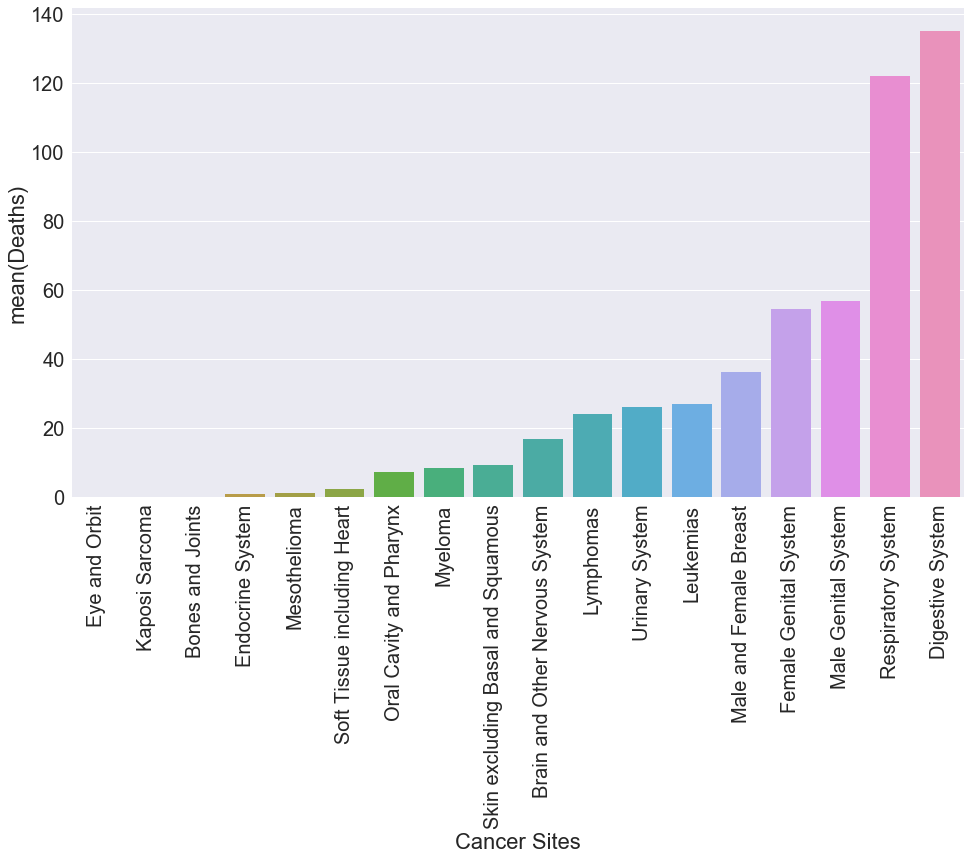

In [87]:
sns.set_context(rc={'figure.figsize': (16,9)})
sns.barplot(x= 'Cancer Sites', y = 'Deaths', data= dfcal_site1)
plt.xticks(rotation = 90)
plt.show()

## In california if the deaths due to Digestive cancer is significantly higher than deaths due to respiratory system

In [89]:
dfcal_site_dig = dfcal_site[dfcal_site['Cancer Sites'] == 'Digestive System']
dfcal_site_res = dfcal_site[dfcal_site['Cancer Sites'] == 'Respiratory System']


In [90]:
dfcal_site_dig_mean = dfcal_site_dig['Deaths'].mean()
dfcal_site_res_mean = dfcal_site_res['Deaths'].mean()
print(dfcal_site_dig_mean, dfcal_site_res_mean)

135.09141445336627 122.12382075471699


In [91]:
stats.ttest_ind(dfcal_site_dig['Deaths'], dfcal_site_res['Deaths'])

Ttest_indResult(statistic=1.4655450262595033, pvalue=0.14286717280938377)

In california the deaths due to digestive cancer is not significantly higher than deaths due to respiratory system. There is no significant different in the deaths due to two cancers in california. However, when considering the whole USA deaths due to res system was significantly higher than that due to dig system. 
This suggests that different features (independent variables) like states, cancer sites and others interact with each other to influence the deaths due to cancer, hence it is important to find out which of these features are most important factors to consider when trying to predict the deaths due to cancer.  